1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Sampling Your Data
4. Build Model
    4. a. Try DecisionTree, RandomForest
5. Perform model on training set and test set using gridsearch CV
6. Measure performance of the model.
7. Which metric is your main metric for this problem and why? What is your main model as well as their params and why?


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

** Submit Link **: https://forms.gle/aAjeG25RPUtQHijs9

Churn rate is a marketing metric that describes the number of customers who leave a business over a specific time period. Every user is assigned a prediction value that estimates their state of churn at any given time. This value is based on:

Age- Age Of The Customer

Employment Type- The Sector In Which Customer Is Employed

GraduateOrNot- Whether The Customer Is College Graduate Or Not

AnnualIncome- The Yearly Income Of The Customer In Indian Rupees[Rounded To Nearest 50 Thousand Rupees]

FamilyMembers- Number Of Members In Customer's Family

ChronicDisease- Whether The Customer Suffers From Any Major Disease Or
Conditions Like Diabetes/High BP or Asthama,etc.

FrequentFlyer- Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years[2017-2019].

EverTravelledAbroad- Has The Customer Ever Travelled To A Foreign Country[Not Necessarily Using The Company's Services]

TravelInsurance- Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.

## Load Dataset

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("D:/Duy/Năm 3/HK 2/Nhập môn ML/Tuần 4/TravelInsurancePrediction.csv")
df.head()
#ToDo: Show histogram of dataframe

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


## Data Analysis

In [18]:
df.drop_duplicates(inplace=True) # remove duplicates

### Use ydata_profiling

In [3]:
from ydata_profiling import ProfileReport

In [4]:
profile = ProfileReport(df, title = "Report")

In [5]:
profile.to_file("D:/Duy/Năm 3/HK 2/Nhập môn ML/Tuần 4/Travel_Insurance_Report.html")

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\ydata_profiling\profile_report.py:365: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 227.86it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
import webbrowser

# open report by web browser
webbrowser.open("Travel_Insurance_Report.html")

True

### Manual EDA

In [19]:
# Data analysis
# Todo: analyze your data here
# check for missing values
df.isnull().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [20]:
def plot_all_his(df):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import math

    df_copy = df.copy()
    df_copy.replace([np.inf, -np.inf], np.nan, inplace=True) # replace inf by nan
    
    cols = df_copy.select_dtypes(include='number').columns  # numerical columns
    n_cols = len(cols)  # number of numerical columns
    
    plt.figure(figsize=(24, 12))

    for i, col in enumerate(cols, 1):
        plt.subplot(math.ceil(n_cols / 4), 4, i)     # create subplot
        sns.histplot(df[col], bins=20)
        plt.title(f"Histogram plot of {col}")

    plt.tight_layout()
    plt.show()

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

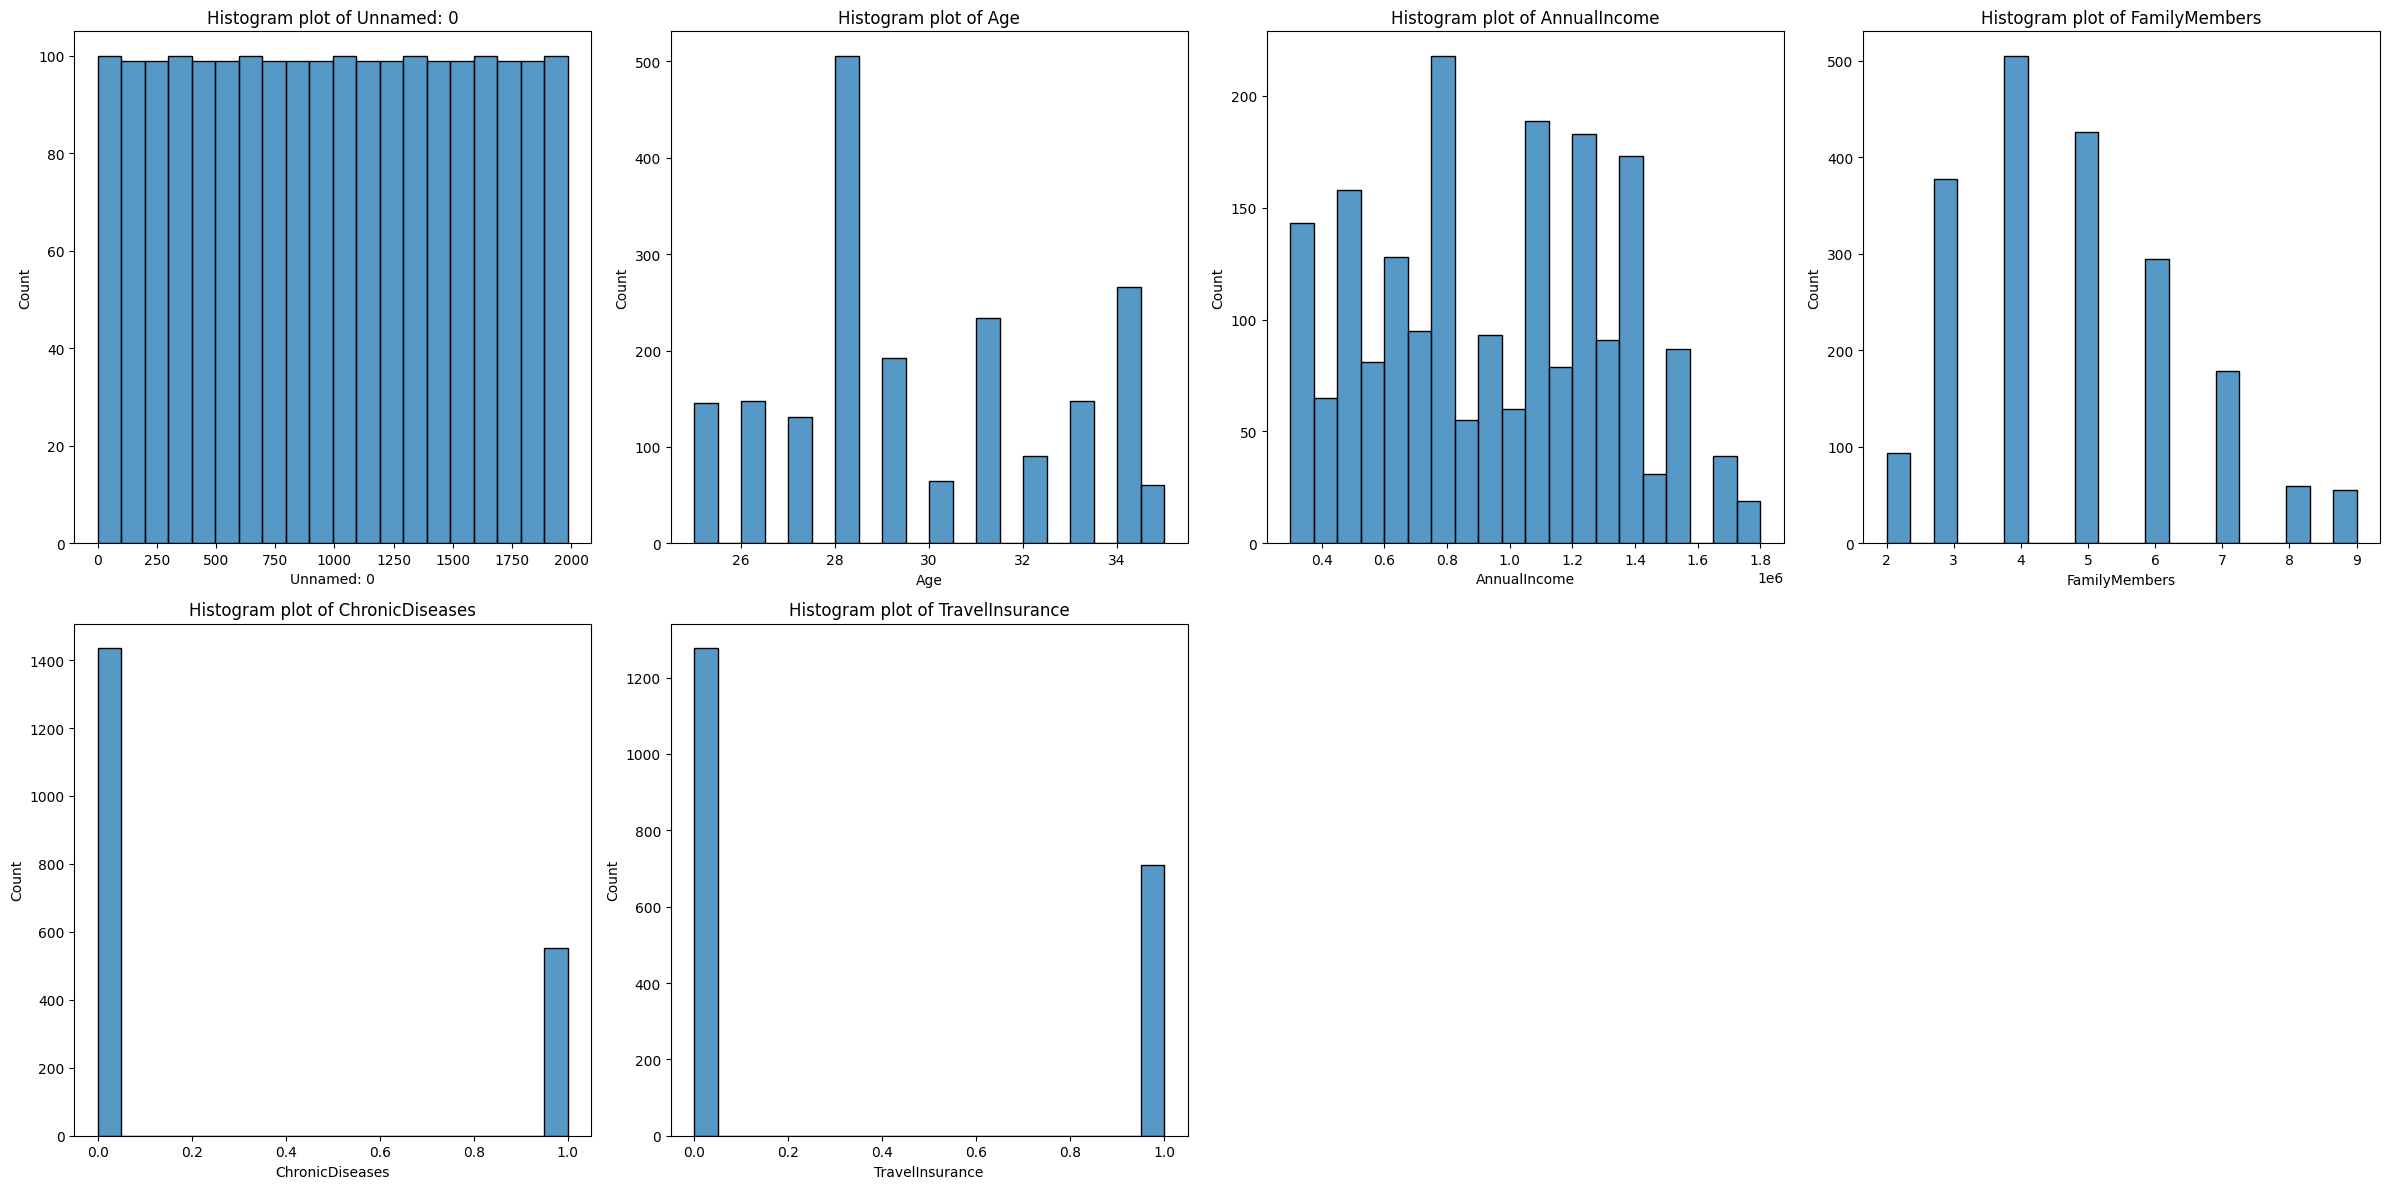

In [21]:
plot_all_his(df)

In [22]:
count_no_insurance = (df['TravelInsurance'] == 0).sum()
count_have_insurance = (df['TravelInsurance'] == 1).sum()
print("No insurance: ", count_no_insurance)
print("Have insurance: ", count_have_insurance)

No insurance:  1277
Have insurance:  710


## Preprocessing

In [23]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    df.drop("Unnamed: 0", axis=1, inplace=True)
    
    return df

In [24]:
df = preprocessing_data(df.copy())

In [25]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


## Feature Engineering

<Axes: >

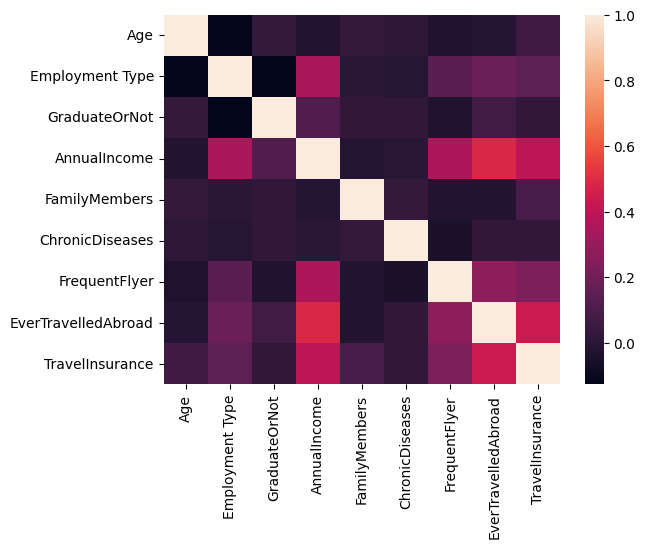

In [26]:
# Heatmap
import seaborn as sns

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: Normalize your data
    df['Employment Type'] = df['Employment Type'].astype("category").cat.codes
    yes_no_cols = ['GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']
    df[yes_no_cols] = df[yes_no_cols].apply(lambda col: col.map({'Yes': 1, 'No': 0}))
    
    return df

df = apply_feature_engineering(df)
sns.heatmap(df.corr()) # Show heatmap after normalized data

In [27]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0


In [28]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    feature_names = df.columns.tolist()
    feature_names.remove("TravelInsurance")
    
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    X = df[feature_names].values # Todo: Select features
    y = df.TravelInsurance.values # Todo: Select label
    return X, y

X, y = prepare_X_y(df)

# Apply machine learning model

## Train-test split

In [29]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 1
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

In [30]:
# check for imbalance in trainY
unique, counts = np.unique(trainY, return_counts=True)
print(dict(zip(unique, counts)))

{0: 894, 1: 496}


## Build SK-learn model

### Decision Tree

#### Upsampling by resample

In [59]:
from sklearn.metrics import classification_report, precision_score, accuracy_score, recall_score, f1_score
from imblearn.pipeline import Pipeline # imbalance learn
from imblearn import FunctionSampler
from sklearn.utils import resample 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

def upsampling_func(X, y):
    # Separate classes
    X_neg = X[y == 0]
    y_neg = y[y == 0]
    X_pos = X[y == 1]
    y_pos = y[y == 1]

    # Resample positive class
    X_pos_upsampled, y_pos_upsampled = resample(
        X_pos, y_pos,
        replace=True,
        n_samples=len(y_neg),
        random_state=0
    )
    
    # Combine and shuffle
    X_combined = np.vstack((X_neg, X_pos_upsampled))
    y_combined = np.concatenate((y_neg, y_pos_upsampled))
    
    return X_combined, y_combined

def build_model_1(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """
    
    # embed rasampling function into pipeline
    upsampler = FunctionSampler(func=upsampling_func)
    clf = DecisionTreeClassifier(random_state=42)

    # Todo: Input your scaler and logistic model into pipeline
    pipe = Pipeline(steps=[
        ('upsampling', upsampler),
        ('tree', clf)
    ])
    
    # set parameters of pipeline
    param_grid = {
        'tree__criterion' : ['gini', 'entropy', 'log_loss'],
        'tree__max_depth' : [None, 5, 10, 20], # avoid overfitting
        'tree__min_samples_split' : [2, 5, 10],
        'tree__min_samples_leaf' : [1, 2, 4],
        'tree__max_features' : [None, 'sqrt', 'log2'], # reduce overfitting
        'tree__class_weight' : [None, 'balanced']
    }
    
    # Todo: fit your model with X, y
    model = GridSearchCV(pipe, param_grid, scoring="f1", n_jobs=2, cv=5)
    model.fit(X, y)
    
    return model

def calculate_performance(y_true, y_pred):
    """

    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    # Todo: return your error value like accuracy, f1score, ...
    print("precision", precision_score(y_true, y_pred))
    print("recall", recall_score(y_true, y_pred))
    print("accuracy", accuracy_score(y_true, y_pred))
    print("F1", f1_score(y_true, y_pred))

    # Todo: Only choose one of them as your score for the question 7
    recall = recall_score(y_true, y_pred)
    return recall

model_1 = build_model_1(trainX, trainY)

# Compare on training dataset
pred_1 = model_1.predict(testX)
calculate_performance(testY, pred_1)
print("\n")

# Display best score and parameter
print("Best parameter (CV score = %0.3f)" % model_1.best_score_)
print(model_1.best_params_)
print(classification_report(testY, pred_1))

precision 0.9457364341085271
recall 0.5700934579439252
accuracy 0.8341708542713567
F1 0.7113702623906706


Best parameter (CV score = 0.704)
{'tree__class_weight': None, 'tree__criterion': 'gini', 'tree__max_depth': 5, 'tree__max_features': None, 'tree__min_samples_leaf': 4, 'tree__min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.80      0.98      0.88       383
           1       0.95      0.57      0.71       214

    accuracy                           0.83       597
   macro avg       0.87      0.78      0.80       597
weighted avg       0.85      0.83      0.82       597



In [32]:
# -------------------------------- Model 1 -------------------------------
# get the best model from GridSearchCV
best_model_1 = model_1.best_estimator_

# acess to DecisionTree in the pipeline
tree_model_1 = best_model_1.named_steps["tree"]

# get importance score of each feature
importances_1 = tree_model_1.feature_importances_

# get features' name
feature_names = df.columns.to_list()[:-1]

# find the most important feature
most_important_index = importances_1.argmax()
most_important_feature = feature_names[most_important_index]
most_important_value = importances_1[most_important_index]

print(f"Feature quan trọng nhất: {most_important_feature} (importance = {most_important_value})")

Feature quan trọng nhất: AnnualIncome (importance = 0.6709906596938607)


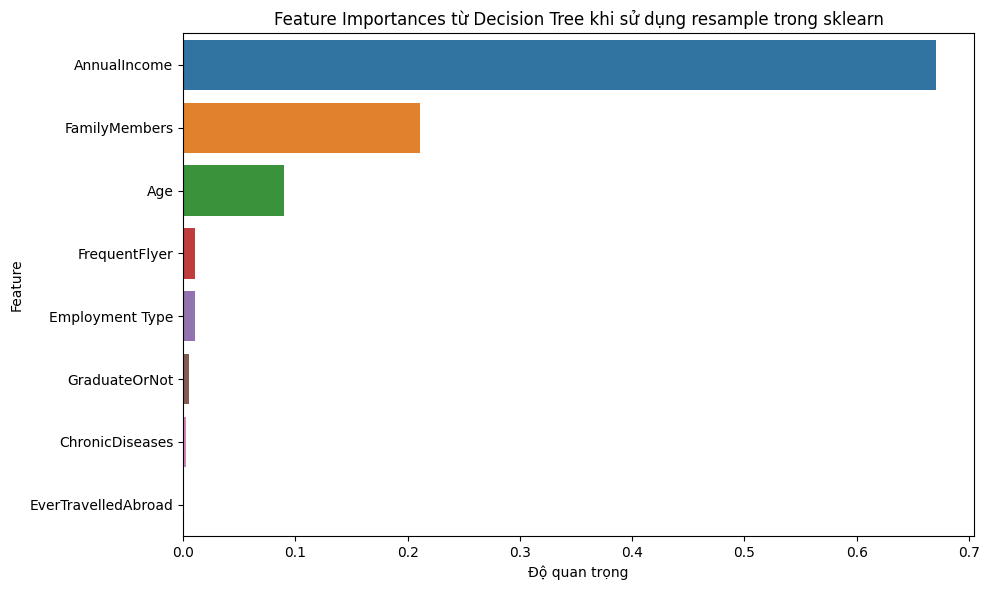

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance_df1 = pd.DataFrame({
    "Feature" : feature_names,
    "Importance" : importances_1
})

feature_importance_df1 = feature_importance_df1.sort_values(by="Importance", ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df1)
plt.title("Feature Importances từ Decision Tree khi sử dụng resample trong sklearn")
plt.xlabel("Độ quan trọng")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

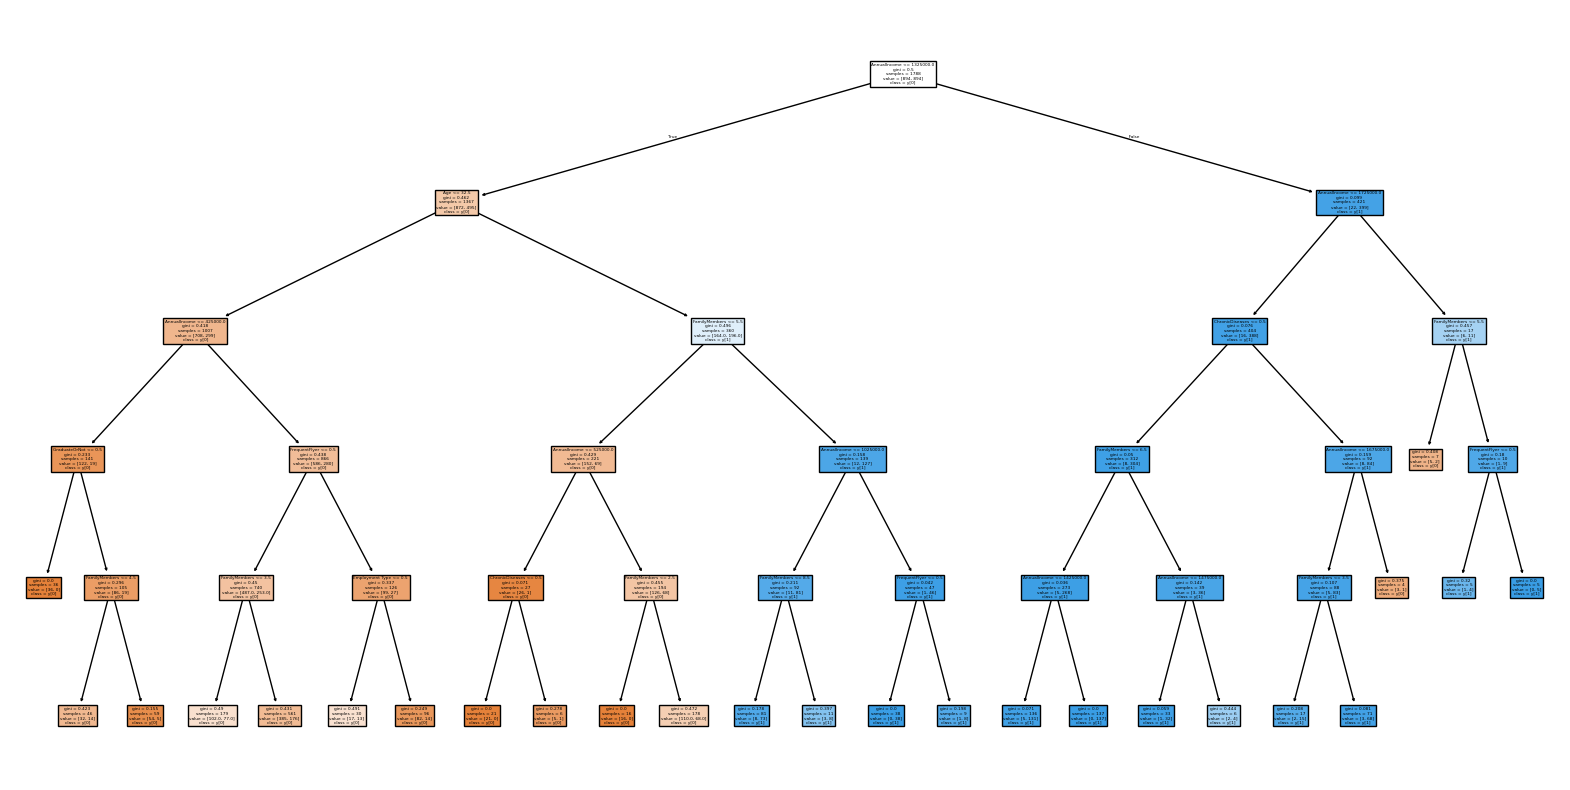

In [34]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model_1, feature_names=feature_names, class_names=True, filled=True)
plt.show()

#### Upsampling by SMOTE

In [52]:
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


def build_model_2(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """
    
    smote = SMOTE(random_state=42)
    clf = DecisionTreeClassifier(random_state=42)

    # Todo: Input your scaler and logistic model into pipeline
    pipe = Pipeline(steps=[
        ('smote', smote), # handle imbalance
        ('tree', clf)
    ])
    
    # set parameters of pipeline
    param_grid = {
        'tree__criterion' : ['gini', 'entropy', 'log_loss'],
        'tree__max_depth' : [None, 5, 10, 20], # avoid overfitting
        'tree__min_samples_split' : [2, 5, 10],
        'tree__min_samples_leaf' : [1, 2, 4],
        'tree__max_features' : [None, 'sqrt', 'log2'], # reduce overfitting
        'tree__class_weight' : [None, 'balanced']
    }
    
    # Todo: fit your model with X, y
    model = GridSearchCV(pipe, param_grid, scoring="f1", n_jobs=2, cv=5)
    model.fit(X, y)
    
    return model

model_2 = build_model_2(trainX, trainY)

# Compare on training dataset
pred_2 = model_2.predict(testX)
calculate_performance(testY, pred_2)
print("\n")

# Display best score and parameter
print("Best parameter (CV score = %0.3f)" % model_2.best_score_)
print(model_2.best_params_)
print(classification_report(testY, pred_2))

precision 0.7674418604651163
recall 0.616822429906542
accuracy 0.7956448911222781
F1 0.6839378238341969


Best parameter (CV score = 0.701)
{'tree__class_weight': None, 'tree__criterion': 'entropy', 'tree__max_depth': 5, 'tree__max_features': None, 'tree__min_samples_leaf': 2, 'tree__min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       383
           1       0.77      0.62      0.68       214

    accuracy                           0.80       597
   macro avg       0.79      0.76      0.77       597
weighted avg       0.79      0.80      0.79       597



In [54]:
# -------------------------------- Model 2 -------------------------------
# get the best model from GridSearchCV
best_model_2 = model_2.best_estimator_

# acess to DecisionTree in the pipeline
tree_model_2 = best_model_2.named_steps["tree"]

# get importance score of each feature
importances_2 = tree_model_2.feature_importances_

# find the most important feature
most_important_index = importances_2.argmax()
most_important_feature = feature_names[most_important_index]
most_important_value = importances_2[most_important_index]

print(f"Feature quan trọng nhất: {most_important_feature} (importance = {most_important_value})")

Feature quan trọng nhất: AnnualIncome (importance = 0.6404554068926649)


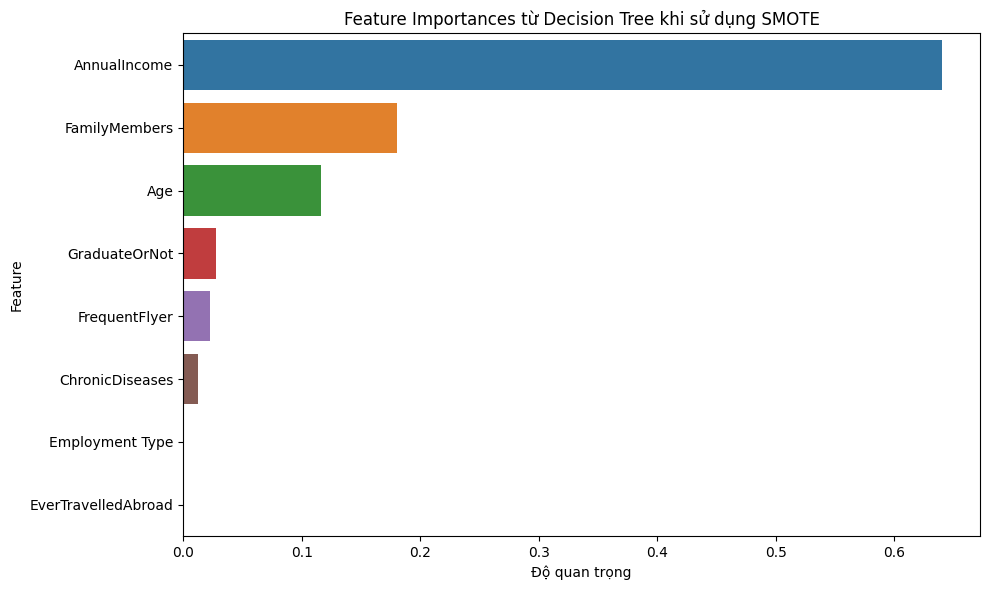

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance_df2 = pd.DataFrame({
    "Feature" : feature_names,
    "Importance" : importances_2
})

feature_importance_df2 = feature_importance_df2.sort_values(by="Importance", ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df2)
plt.title("Feature Importances từ Decision Tree khi sử dụng SMOTE")
plt.xlabel("Độ quan trọng")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

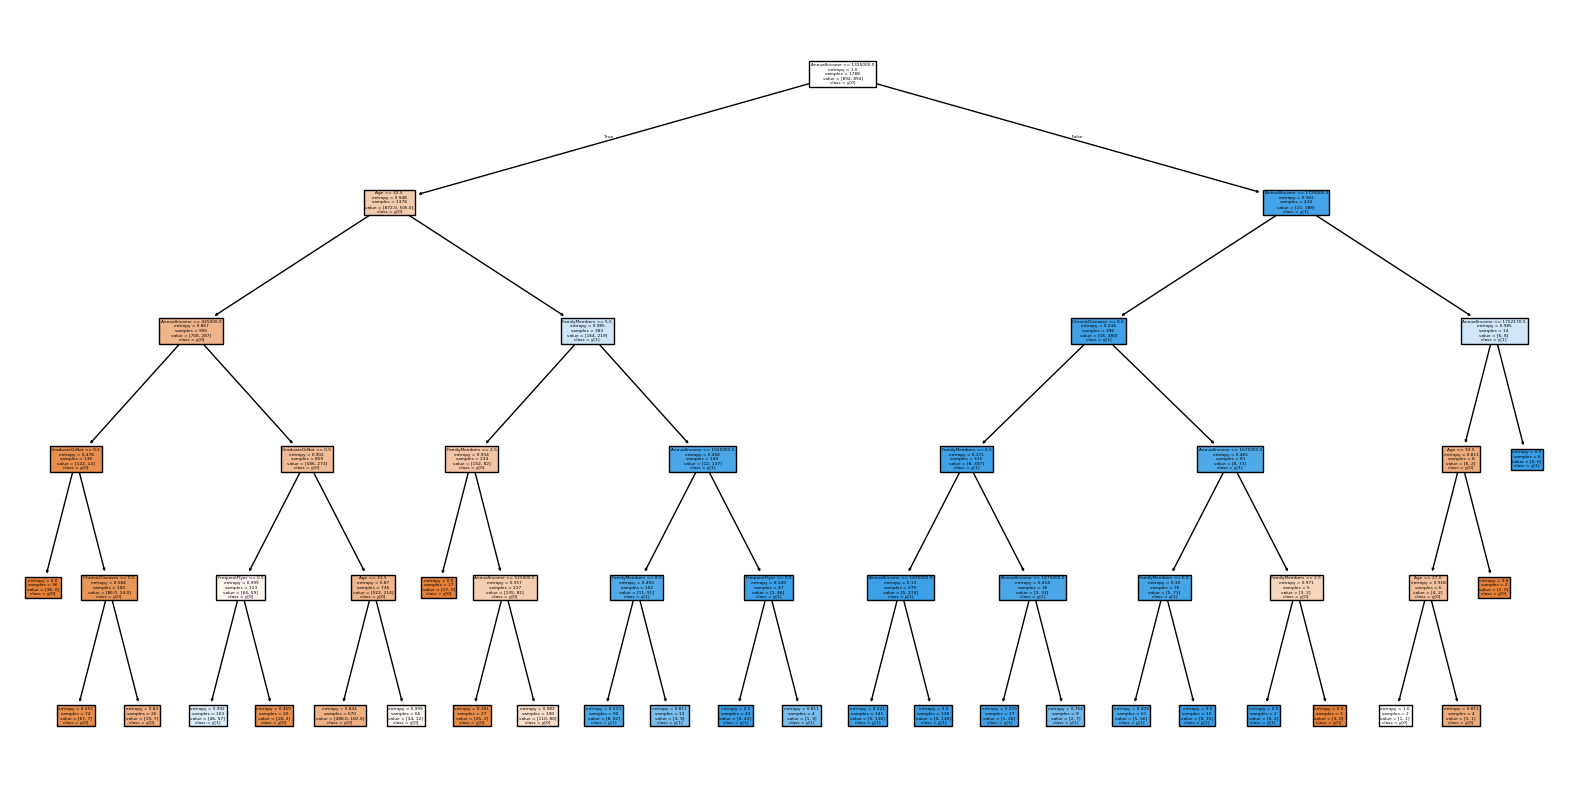

In [56]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model_2, feature_names=feature_names, class_names=True, filled=True)
plt.show()

### Random Forest

In [43]:
import os
print("Number of CPU cores:", os.cpu_count())

Number of CPU cores: 8


In [ ]:
# -------------------------------- Model 3 -------------------------------

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import time

start = time.time()

def build_model_3(X, y):
    
    rf = RandomForestClassifier(random_state=42)
    pipe_rf = Pipeline(steps=[("rf", rf)])
    
    param_grid_rf = {
        'rf__n_estimators' : [20, 50, 75],                 # number of trees
        'rf__criterion': ['gini', 'entropy'],              # split validation
        'rf__max_depth': [None, 5, 10, 20],                # max depth
        'rf__min_samples_split': [2, 5, 10],               # Min samples for split
        'rf__min_samples_leaf': [1, 2, 4],                 # Min samples for leaf
        'rf__max_features': [None, 'sqrt', 'log2'],        # Features for split
        'rf__class_weight': ['balanced']                   # balancing
    }
    
    model = GridSearchCV(pipe_rf, param_grid_rf, scoring='recall', cv=5, n_jobs=8) # use all available cores
    model.fit(X, y)
    
    return model    
    
model_3 = build_model_3(trainX, trainY)
    
print("Best RF parameter (CV score=%.3f):" % model_3.best_score_)
print(model_3.best_params_)

pred_3 = model_3.predict(testX)
print(classification_report(testY, pred_3, digits=3))

end = time.time() 
print("Excute time: {:.2f} seconds".format(end - start))

Best RF parameter (CV score=0.651):
{'rf__class_weight': 'balanced', 'rf__criterion': 'entropy', 'rf__max_depth': None, 'rf__max_features': None, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 10, 'rf__n_estimators': 20}
              precision    recall  f1-score   support

           0      0.817     0.862     0.839       383
           1      0.725     0.654     0.688       214

    accuracy                          0.787       597
   macro avg      0.771     0.758     0.763       597
weighted avg      0.784     0.787     0.785       597

Excute time: 452.66 seconds


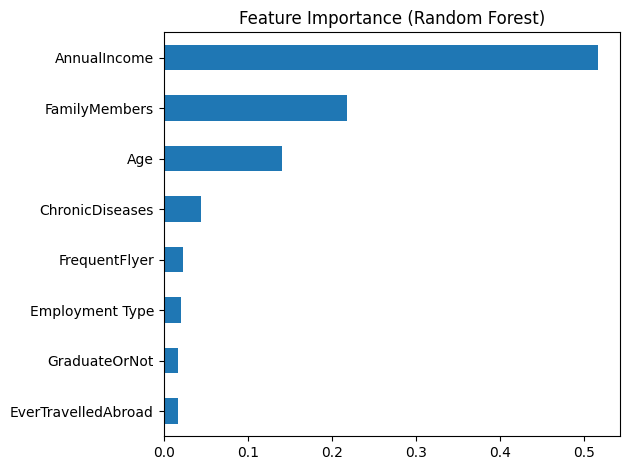

In [45]:
# select the best random forest model
best_rf = model_3.best_estimator_.named_steps['rf']

# Feature importance
import pandas as pd
import matplotlib.pyplot as plt

importance = pd.Series(best_rf.feature_importances_, index=feature_names)
importance.sort_values(ascending=True).plot(kind='barh')
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()

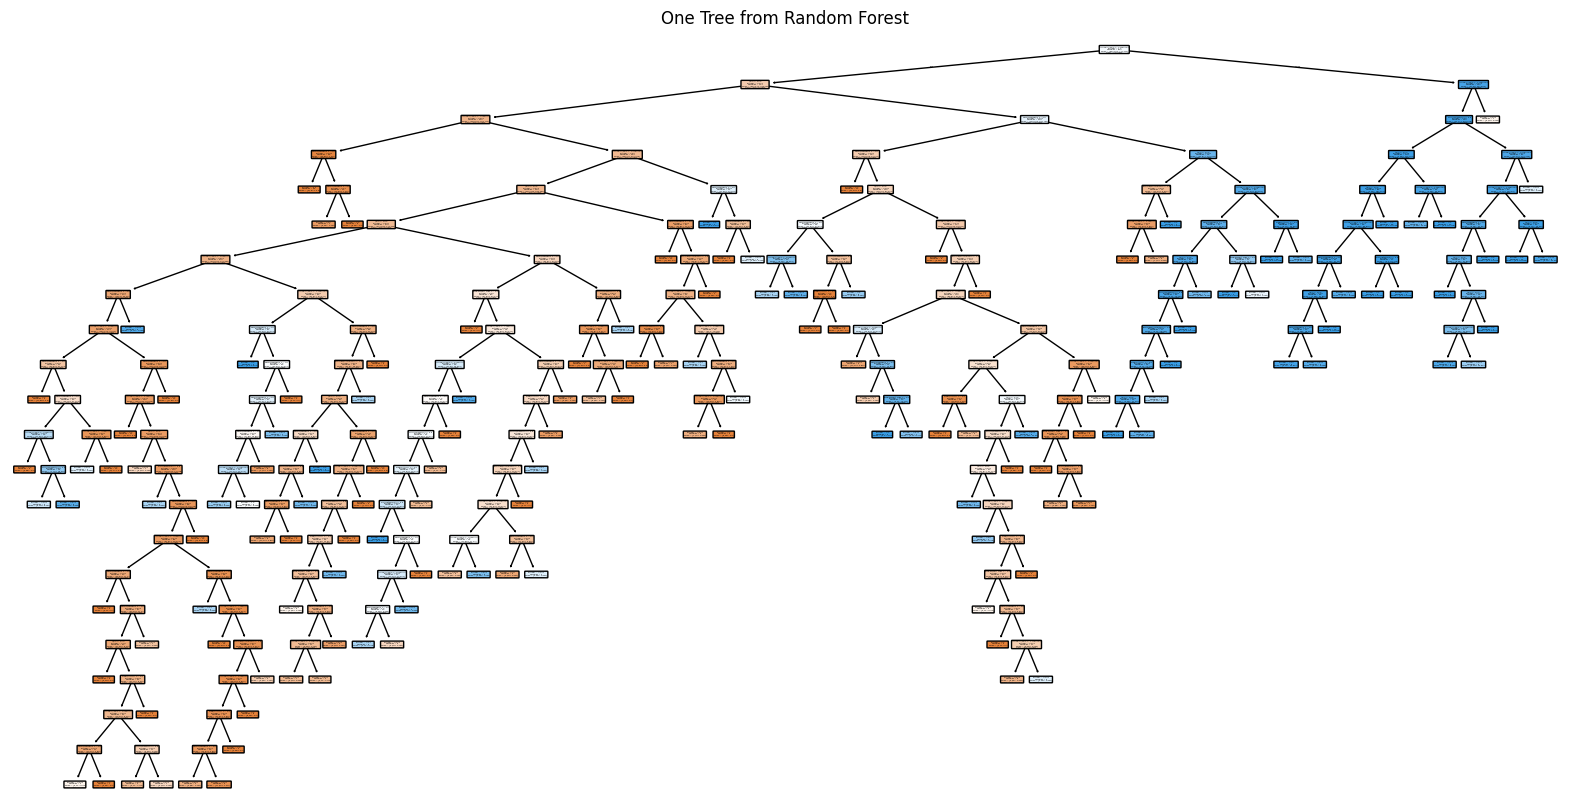

In [46]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Lấy ra cây thứ 0
one_tree = best_rf.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(one_tree,
          feature_names=feature_names,
          class_names=["Not Purchase", "Purchase"],
          filled=True,
          rounded=True)
plt.title("One Tree from Random Forest")
plt.show()

In [64]:
def get_conclusion():
    table = """
    | Model                     | Precision | Recall | Accuracy | F1-score |
    |---------------------------|-----------|--------|----------|----------|
    | Decision Tree + Resample  | 0.946     | 0.570  | 0.834    | 0.711    |
    | Decision Tree + SMOTE     | 0.767     | 0.617  | 0.796    | 0.684    |
    | Random Forest             | 0.725     | 0.654  | 0.787    | 0.688    |
    """
    
    conclusion = (
    "7. Conclusion:\n"
    "Based on the comparison table, the Decision Tree model with Resampling achieved the highest Precision (0.946) and Accuracy (0.834), \n"
    "while Random Forest achieved the highest Recall (0.654) and had a balanced F1-score (0.688). \n"
    "Decision Tree with SMOTE has a slightly lower F1-score (0.684) but a better recall (0.617) than Resample.\n"
    "In general, if the goal is to detect customers who will buy insurance (maximize Recall), Random Forest is the most suitable choice. \n"
    "However, if the goal is to minimize false positives (maximize Precision), Decision Tree + Resample should be prioritized.\n"
    "In this insurance prediction task, I would select Recall as the main evaluation metric. \n"
    "This is because missing a customer who is actually willing to buy insurance (False Negative) can lead to a direct loss of potential revenue.\n"
    "Since Recall is the prioritized metric in this problem, Random Forest is the most appropriate choice, achieving the highest Recall (0.654) among all models.\n"
    "The Random Forest model was optimized using the following parameters: \n"
    "`n_estimators`, `criterion`, `max_depth`, `min_samples_split`, `min_samples_leaf`, `max_features`, and `class_weight`.\n"
    )

    
    return table + "\n" + conclusion


In [65]:
print(get_conclusion())


    | Model                     | Precision | Recall | Accuracy | F1-score |
    |---------------------------|-----------|--------|----------|----------|
    | Decision Tree + Resample  | 0.946     | 0.570  | 0.834    | 0.711    |
    | Decision Tree + SMOTE     | 0.767     | 0.617  | 0.796    | 0.684    |
    | Random Forest             | 0.725     | 0.654  | 0.787    | 0.688    |
    
7. Conclusion:
Based on the comparison table, the Decision Tree model with Resampling achieved the highest Precision (0.946) and Accuracy (0.834), 
while Random Forest achieved the highest Recall (0.654) and had a balanced F1-score (0.688). 
Decision Tree with SMOTE has a slightly lower F1-score (0.684) but a better recall (0.617) than Resample.
In general, if the goal is to detect customers who will buy insurance (maximize Recall), Random Forest is the most suitable choice. 
However, if the goal is to minimize false positives (maximize Precision), Decision Tree + Resample should be prioritized.
In thi